# Forecasting game sales

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

# Step 1. Open the data file and study the general information

In [1]:
#importing libraries
import pandas as pd
!pip install -U matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
!pip install sidetable
import sidetable
!pip install -U seaborn
import seaborn as sns
!pip install -U missingno
import missingno as msno
!pip install -U termcolor
from termcolor import colored
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~atplotlib\\ft2font.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
  Attempting uninstall: missingno
    Found existing installation: missingno 0.5.0
    Uninstalling missingno-0.5.0:
      Successfully uninstalled missingno-0.5.0
  Attempting uninstall: termcolor
    Found existing installation: termcolor 1.1.0
    Uninstalling termcolor-1.1.0:
      Successfully uninstalled termcolor-1.1.0


In [2]:
# reading the file
try:
    games = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\4th project\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

# copying the data so it will load faster
games_raw = games.copy()

# checking the columns for nulls and type and other info
games_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# checking the first 10 rows of the data to see the values
games_raw.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


seems like the nulls are correlated to something, probably to the Year_of_Release being below 2000 ill check it later

In [4]:
# using describe to see more info
games_raw.describe()
games_raw.describe(include = ['object'])

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [5]:
# lets see all object value counts to see everything is ok
games_raw['Name'].value_counts()
games_raw['Platform'].value_counts()
games_raw['Genre'].value_counts()
games_raw['User_Score'].value_counts()
games_raw['Rating'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

* right of the bat, the NA_sales average is the highest and Other_sales average is the lowest
* we have 0 value for sales which is a bit weird cause every game has to sell something but maybe its 0 because its in millions and the actual sales were too small of a number.
* the max Critic_Score is 98 which means no game got 100.
* since the count and unique number of Name isnt the same i can conclude there are duplicates here, also we can see that there are 12 times the name "Need for Speed: Most Wanted", ill check it up
* we have 31 different platforms?? seems weird
* how there are 96 unique User_Score's if its from 1-10?

In [6]:
# checking the percentage of nulls in each column
games_raw.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


### Conclusion

* 6 columns have nulls in the table, and some columns are of the wrong type (Year_of_Release, Critic_Score and User_Score all should be integers)
* seems like the nulls are correlated to something, probably to the Year_of_Release being below 2000 ill check it later
* maybe i should change the Rating column into numbers instead of letters and then itll be more usable to do corr(?).
* the NA_sales average is the highest and Other_sales average is the lowest
* we have 0 value for sales which is a bit weird cause every game has to sell something but maybe its 0 because its in millions and the actual sales were too small of a number.
* the max Critic_Score is 98 which means no game got 100.
* since the count and unique number of Name isnt the same i can conclude there maybe are duplicates here, also we can see that there are 12 times the name "Need for Speed: Most Wanted", ill check it up
* we have 31 different platforms?? seems weird
* how there are 96 unique User_Score's if its from 1-10? and tbd is the most frequent one...

# Step 2. Prepare the data

First ill organize the table a bit:

In [7]:
# saving to organized tables
orgnzd_games = games_raw.copy()
orgnzd_games.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [8]:
# lower casing relevant object columns
orgnzd_games['Name'] = orgnzd_games['Name'].str.lower()
orgnzd_games['Platform'] = orgnzd_games['Platform'].str.lower()
orgnzd_games['Genre'] = orgnzd_games['Genre'].str.lower()
# df = df.applymap(lambda s:s.lower() if type(s) == str else s)

Replacing the column names (making them lowercase)

In [9]:
# lower casing column names
orgnzd_games.columns = orgnzd_games.columns.str.lower()
# orgnzd_games= orgnzd_games.rename(columns=str.lower)
orgnzd_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [10]:
# checking for duplicate games
orgnzd_games['name'].duplicated().sum()

5155

lets see what are the differences between the duplicate rows, ill take as an example the game that has the most rows: "need for speed: most wanted"

In [11]:
orgnzd_games.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


* seems that this game came out in 2005 and 2012 by the same title (i checked it and its true) **but for the sake of analysis ill need to differentiate between them in the name column**
* also "xb" and "gc" platforms seemed weird.. i looked on the web for them and gc stands for nintendo's game cube, but found nothing on xb, so <s>i am guessing</s> its the original xbox (i looked at the platforms that the game was released on in 2005 and xbox was there alongside xbox360 so my guess was correct!) 
* also i am surprised there is no mention about mobile ios and android platforms since they are mentioned as platforms alongside all the others in the 2012 version of the game on the web. 
* seems that jp_sales was almost non existent for this game.. i guess that sales below 10000 are represented as 0.00 milion because all the sales represented **only** by 2 decimal places. (since its not probable that a game sold 0 copies)
* i checked and "need for speed: most wanted" was released on wiiu in 2012 as well, and not 2013 so its probably a typo, so lets fix it.

In [12]:
# changing the 2013 year to the correct 2012 year
orgnzd_games.at[6273, 'year_of_release'] = 2012.0
# checking it worked
orgnzd_games.loc[6273]['year_of_release']

2012.0

In [13]:
# making function to differentiate between the years in the name column
def add_year_to_name(row):
    year = row['year_of_release']
    name = row['name']
    if year == 2012.0:
        return name + ' 2012'
    else:
        return name + ' 2005' # = 'need for speed: most wanted 2005'

In [14]:
# applying the function
#orgnzd_games.query('name == "need for speed: most wanted"')['name'] = orgnzd_games.query('name == "need for speed: most wanted"').apply(add_year_to_name, axis = 1)
#nfs_table['name'] = nfs_table.apply(add_year_to_name, axis = 1)
orgnzd_games.loc[orgnzd_games['name'] == 'need for speed: most wanted', 'name'] = orgnzd_games.query('name == "need for speed: most wanted"').apply(add_year_to_name, axis = 1)

In [15]:
# checking it worked (supposed to be no rows)
orgnzd_games.query('name == "need for speed: most wanted"')
#nfs_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
# checking for duplicate rows (i bet no one else thought to look for them that way!!)
orgnzd_games.loc[orgnzd_games.duplicated(subset = ['name', 'platform'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1745,sonic the hedgehog,ps3,2006.0,platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,ps3,NaN,platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,sports,0.00,0.01,0.00,0.00,83.0,5.5,E


so we have 2 (3 if to count the null) duplicates, we can see that by looking at the name, platform, both scores, and rating are the same.<br>
the question now is do i drop the rows or merge the data in them about the sales?..<br>
since i dont know how to "concat" those rows and in a way that will leave all the other columns unchanged (i searched for a way atleast for 20 minutes), ill drop the duplicates:

In [17]:
# droping duplicate rows
orgnzd_games.drop_duplicates(subset = ['name', 'platform'], keep = 'first', inplace = True)
orgnzd_games.reset_index(inplace = True, drop = True)
# checking for duplicates again
orgnzd_games.loc[orgnzd_games.duplicated(subset = ['name', 'platform'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


lets check all the 31 platforms (its weird that there are so many)

In [18]:
# looking at all the 31 different "platforms"
orgnzd_games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

SAT-Saturn (Sega video game console), SCD-Sega CD <br>
i found all of those acronyms on the web and confirmed them to really be platforms, the only one i couldnt find is GEN i just couldnt find what it is, maybe its Sega Genesis

now lets look at why there are so many unique user scores:

In [19]:
# looking at all the unique user scores
orgnzd_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<s>there is no point in having a 0-10 rating if we have decimals, so ill convert the column to float type and multiply it times 10 to make it from 0-100 instead. <br>
but first</s> i need to decide what to do with the TBDs.. lets look at all the rows with it:

In [20]:
orgnzd_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16692,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16694,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16695,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16701,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


i noticed that only the column jp_sales has only 1 decimal place after the dot, out of all the sales columns which have 2 places even when its 0.00.
so i think that maybe its TBD because there was not met some threshold of sales before calculating and determining the user score. if that threshold is being sold in all markets then the jp_sales column should be 0 from start to finish, lets check:

In [21]:
# should show me an empty table if my assumption is correct
orgnzd_games.query('user_score == "tbd" and jp_sales != 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
821,the incredibles,gba,2004.0,action,1.15,0.77,0.04,0.10,55.0,tbd,E
1089,"monsters, inc.",gba,2001.0,adventure,0.59,0.95,0.03,0.10,NaN,tbd,E
1199,mysims kingdom,ds,2008.0,simulation,0.80,0.59,0.01,0.16,58.0,tbd,E
1862,nba live 2001,ps2,2001.0,sports,0.52,0.40,0.04,0.13,74.0,tbd,E
2043,disney fairies: tinker bell and the lost treasure,ds,2009.0,adventure,0.56,0.34,0.02,0.09,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16263,shepherd's crossing,psp,2009.0,simulation,0.00,0.00,0.01,0.00,NaN,tbd,E
16298,caladrius,x360,2013.0,shooter,0.00,0.00,0.01,0.00,NaN,tbd,T
16361,nitroplus blasterz: heroines infinite duel,ps3,2015.0,fighting,0.00,0.00,0.01,0.00,NaN,tbd,T
16504,world heroes anthology,ps2,2007.0,fighting,0.00,0.00,0.01,0.00,53.0,tbd,T


guess its not that.. last guess is maybe its the game itself, lets check:

In [22]:
# checking if a game that is tbd also has a score
tbd_score = orgnzd_games.query('user_score == "tbd"')
not_tbd_score = orgnzd_games.query('user_score != "tbd"')
for name in tbd_score['name']:
    if name in list(not_tbd_score['name']):
        print('guess not correct :(')
        break
    else:
        print('guess correct :)')

guess not correct :(


well obviously tbd is "to be determined" which means non existing data which means null, so ill replace them with na.

In [23]:
# replacing tbd with nulls
orgnzd_games['user_score'].replace('tbd', np.nan, inplace = True)

Now ill start dealing with missing values:

<AxesSubplot: >

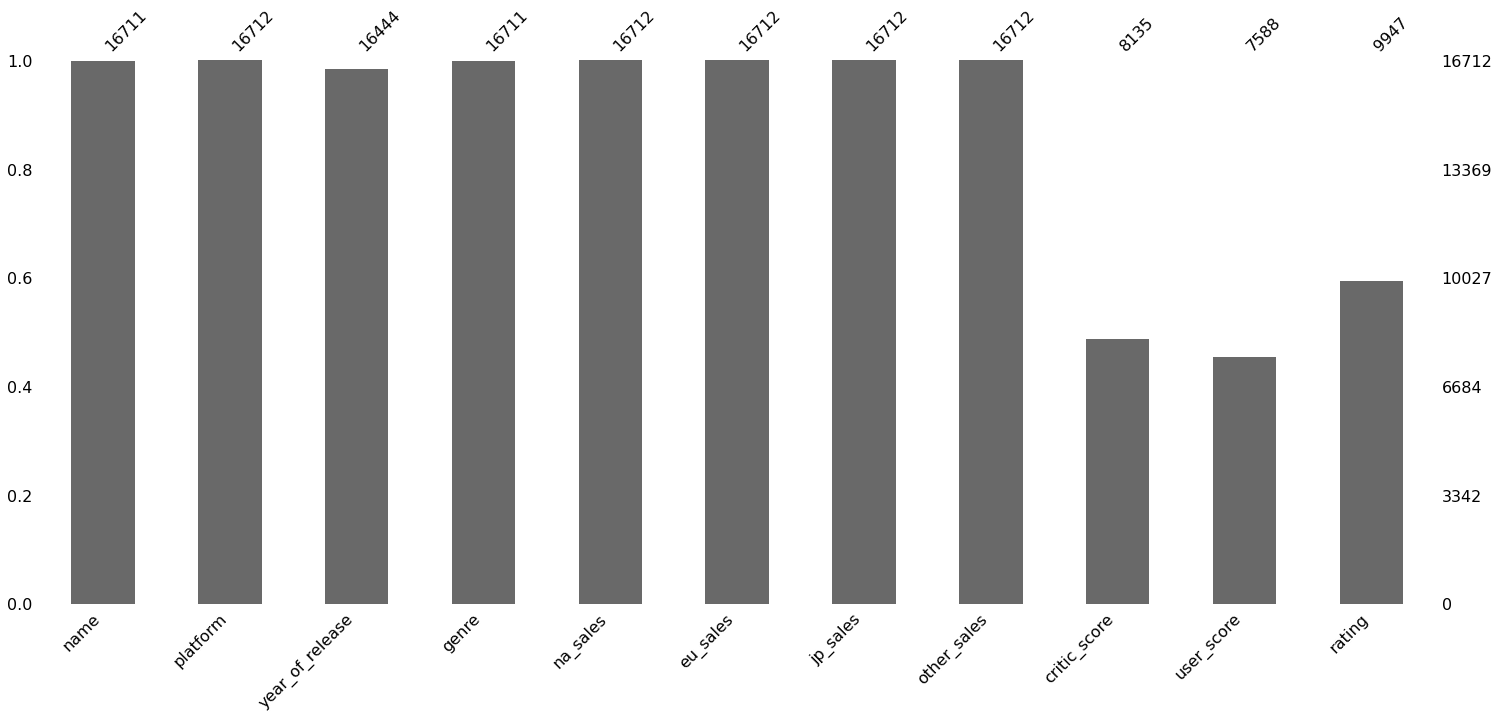

In [25]:
msno.bar(orgnzd_games)

<AxesSubplot: >

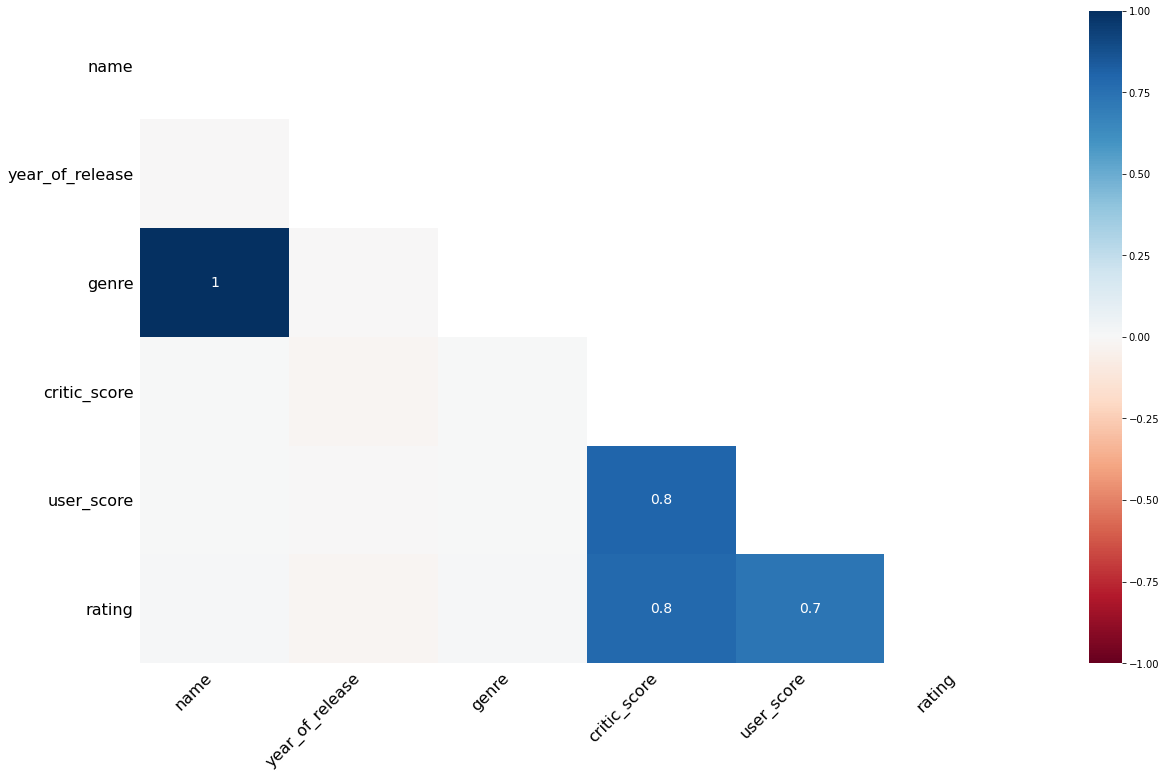

In [26]:
msno.heatmap(orgnzd_games)

lets start with the easy column: genre

In [24]:
# looking at the rows with null genre
orgnzd_games.loc[orgnzd_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


since there is almost no info here and its only 1 row ill drop it

In [25]:
# dropping those rows
orgnzd_games.drop(659, inplace = True)
orgnzd_games.reset_index(inplace = True, drop = True)
orgnzd_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   object 
 10  rating           9947 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


the next one is: year_of_release

In [26]:
# looking at the rows with null year_of_release
orgnzd_games.loc[orgnzd_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16369,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16401,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16444,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16454,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


seems there are rows that have years in their names, lets use that:

In [27]:
def fill_year_by_number_in_name(row):
    name = row['name']
    year = row['year_of_release']
    for word in name.split():
        if word.isdigit(): # and (len(word) == 4 or len(word) == 2):
            if len(word) == 4:
                number = float(word)
                return number
            elif len(word) == 2:
                number = float(word)
                #if word[0] == '0' or word[0] == '1': --------> # i changed this function after i discoverd in cell 56 that
                if int(word) < 17:                              # there is a game that had 64 in its name and so its year
                    return 2000 + number #float('20' + word)    # was set to 1964 which cant be since the first console was
                elif int(word) > 71:                            # made in 1972
                    return 1900 + number
            else:
                continue
            #number = float(word)#- 1
            # checked online and turns out the actual year is one before what is written in the name but i noticed that the
            # existing years is corresponding to the year that is in the title and not the actual year so i hushed the -1
            # here and continue the trend.
            #return number
            #year = number
            #year.fillna(number, inplace = True)
        else:
            continue

In [28]:
# applying the function
orgnzd_games.loc[orgnzd_games['year_of_release'].isna(), 'year_of_release'] = orgnzd_games.loc[orgnzd_games['year_of_release'].isna()].apply(fill_year_by_number_in_name, axis = 1)
#dummy_copy['year_of_release'] = dummy_copy.apply(fill_year_by_number_in_name, axis = 1)

In [29]:
# checking how many nulls i have left and the rows of the ramaining nulls themselves
orgnzd_games.loc[orgnzd_games['year_of_release'].isna()]
#dummy_copy['year_of_release'].isna().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
677,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16344,agarest senki: re-appearance,ps3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16401,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16444,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16454,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


now lets check like before if there are maybe the same games (which i assume have the same release date) in the not null year part of the table:

In [30]:
# checking if a game that is null year also has a year
null_year = orgnzd_games.loc[orgnzd_games['year_of_release'].isna()]
not_null_year = orgnzd_games.loc[orgnzd_games['year_of_release'].notna()]
great_count = 0
bummer_count = 0
for name in null_year['name']:
    if name in list(not_null_year['name']):
        #print('great!')
        great_count += 1
    else:
        #print('bummer')
        bummer_count += 1
        
print('the number of nulls i can fill is:', great_count,'\n' 'and the number that is left:', bummer_count)

the number of nulls i can fill is: 110 
and the number that is left: 137


great! now ill use them to fill what i can:

In [31]:
def fill_year_by_name(row):
    name = row['name']
    year = row['year_of_release']
    if str(name) in list(not_null_year['name']):
        value = not_null_year.loc[not_null_year['name'] == str(name)]['year_of_release'].median()
        return value

In [32]:
# applying the function
orgnzd_games.loc[orgnzd_games['year_of_release'].isna(), 'year_of_release'] = orgnzd_games.loc[orgnzd_games['year_of_release'].isna()].apply(fill_year_by_name, axis = 1)
#dummy_copy['year_of_release'] = dummy_copy.apply(fill_year_by_name, axis = 1)

In [33]:
# checking how many nulls i have left and the rows of the ramaining nulls themselves
orgnzd_games.loc[orgnzd_games['year_of_release'].isna()]
#dummy_copy

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
804,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1141,rock band,ps3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1505,adventure,2600,NaN,adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16273,homeworld remastered collection,pc,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16284,shorts,ds,NaN,platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16344,agarest senki: re-appearance,ps3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16454,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


lets see how many unique games are ramaining here:

In [34]:
unique_games = len(list(orgnzd_games.loc[orgnzd_games['year_of_release'].isna()]['name'].unique()))
unique_games

125

thats too much to start check manualy on the web... <br>
so ill take the <s>10 highest grossing</s> (after i saw what are the games and the total sales decided to change) above 1 mil games and fill the release date for them only and drop all the rest. <br>
for that i need to make a column of total sales:

In [35]:
# making a total sales column
orgnzd_games['total_sales'] = orgnzd_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
# checking it worked
orgnzd_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [36]:
null_year = orgnzd_games.loc[orgnzd_games['year_of_release'].isna()] 
null_year_total_sales_p_game = null_year.pivot_table(index = 'name', values = ['total_sales'], aggfunc = 'sum')
above_mil_null_year_games = null_year_total_sales_p_game.sort_values('total_sales', ascending = False).query('total_sales > 1')
above_mil_null_year_games

,total_sales
name,
rock band,7.30
frogger's adventures: temple of the frog,2.40
test drive unlimited 2,1.50
adventure,1.30
combat,1.25
legacy of kain: soul reaver,1.05
donkey kong land iii,1.03


i have no way of finding games named "adventure" and "combat" so ill drop them:

In [28]:
# turns out 5 is the lucky number :)
top_5_null_year_games = above_mil_null_year_games.query('name != ["adventure", "combat"]')
top_5_null_year_games

NameError: name 'above_mil_null_year_games' is not defined

In [38]:
#Creating a dictionary of game titles and years to fill manually
name_year = {'rock band': 2007,
             "frogger's adventures: temple of the frog": 2001,
             'test drive unlimited 2': 2011,
             'legacy of kain: soul reaver': 1999,
             'donkey kong land iii': 1997
            }
#Fill missing years using dict name_year
orgnzd_games['year_of_release'] = orgnzd_games['year_of_release'].fillna(orgnzd_games['name'].map(name_year))

#Checking rock band to see if it worked
orgnzd_games[orgnzd_games.name == 'rock band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
627,rock band,x360,2007.0,misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
804,rock band,wii,2007.0,misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1141,rock band,ps3,2007.0,misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62
1839,rock band,ps2,2007.0,misc,0.71,0.06,0.0,0.35,82.0,6.8,T,1.12


In [39]:
orgnzd_games.loc[orgnzd_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1505,adventure,2600,NaN,adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN,1.30
1584,combat,2600,NaN,action,1.17,0.07,0.00,0.01,NaN,NaN,NaN,1.25
2105,air-sea battle,2600,NaN,shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN,0.98
2107,suikoden iii,ps2,NaN,role-playing,0.29,0.23,0.38,0.08,86.0,7.7,T,0.98
2168,yakuza 4,ps3,NaN,action,0.15,0.13,0.63,0.05,78.0,8,M,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...
16273,homeworld remastered collection,pc,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01
16284,shorts,ds,NaN,platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+,0.01
16344,agarest senki: re-appearance,ps3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16454,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [40]:
# checking the percentage of nulls in each column
orgnzd_games.stb.missing(style=True)

,missing,total,percent
user_score,"9,123","16,711",54.59%
critic_score,"8,576","16,711",51.32%
rating,"6,764","16,711",40.48%
year_of_release,127,"16,711",0.76%
name,0,"16,711",0.00%
platform,0,"16,711",0.00%
genre,0,"16,711",0.00%
na_sales,0,"16,711",0.00%
eu_sales,0,"16,711",0.00%
jp_sales,0,"16,711",0.00%


well i guess now i can, with a heavy heart, drop those null rows (i was thinking on leaving them as they are or changing the year to 0 but it would interfere with calculations later) in the year_of_release column that amount to less than 1 percent nulls.

In [41]:
# droping year_of_release nulls
orgnzd_games.dropna(subset = ['year_of_release'], inplace = True)
# converting year to int type and user score to float
orgnzd_games['year_of_release'] = orgnzd_games['year_of_release'].astype('int')
orgnzd_games['user_score'] = orgnzd_games['user_score'].astype('float')
# reseting index and checking everything worked
orgnzd_games.reset_index(inplace = True, drop = True)
orgnzd_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16584 entries, 0 to 16583
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16584 non-null  object 
 1   platform         16584 non-null  object 
 2   year_of_release  16584 non-null  int32  
 3   genre            16584 non-null  object 
 4   na_sales         16584 non-null  float64
 5   eu_sales         16584 non-null  float64
 6   jp_sales         16584 non-null  float64
 7   other_sales      16584 non-null  float64
 8   critic_score     8087 non-null   float64
 9   user_score       7550 non-null   float64
 10  rating           9879 non-null   object 
 11  total_sales      16584 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


next to fill is user score, lets check to what it mostly correlates:

In [42]:
orgnzd_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092751,0.003876,-0.168136,0.037655,0.011740,-0.264733,-0.076467
na_sales,-0.092751,1.000000,0.765430,0.449917,0.638716,0.240803,0.086194,0.941063
eu_sales,0.003876,0.765430,1.000000,0.435145,0.722709,0.220978,0.055507,0.901260
jp_sales,-0.168136,0.449917,0.435145,1.000000,0.291035,0.152383,0.125768,0.612428
other_sales,0.037655,0.638716,0.722709,0.291035,1.000000,0.198622,0.057133,0.749234
critic_score,0.011740,0.240803,0.220978,0.152383,0.198622,1.000000,0.580589,0.245587
user_score,-0.264733,0.086194,0.055507,0.125768,0.057133,0.580589,1.000000,0.088259
total_sales,-0.076467,0.941063,0.901260,0.612428,0.749234,0.245587,0.088259,1.000000


so the most it correlates to is critic_score, no surprise there, but its actually only by 60% and its not enough to rely on it to fill the nulls by it. <br>
<s> i would have thought that there would be a greater correlation between critic_score and year_of_release because based on the web they started making those scores in 1999 when GameRankings was founded, but i guess corr is not taking into account all the nulls..</s> lets check, if my theory is correct then all critic_scores of the games before 1999 suposed to be null:

In [43]:
pre99games = orgnzd_games.loc[orgnzd_games['year_of_release'] < 1999].count()
pre99games

name               1637
platform           1637
year_of_release    1637
genre              1637
na_sales           1637
eu_sales           1637
jp_sales           1637
other_sales        1637
critic_score         57
user_score           61
rating               63
total_sales        1637
dtype: int64

we have 57 rows that are of pre 1999 games that have a critic_score, so lets check what year was the first critic score:

In [44]:
orgnzd_games.loc[orgnzd_games['critic_score'].notna()]['year_of_release'].min()

1985

well then all games below 1985 not supposed to have a critic score. so ill fill all the other nulls in this column by the median score of each game because my assumption is that if a game was ranked on 1 platform it was ranked on all the platforms it was released.

In [45]:
# filling the critic_score column nulls (of games above the year 1984) by the median score of each name
orgnzd_games.loc[orgnzd_games['year_of_release'] > 1984, 'critic_score'] = orgnzd_games.loc[orgnzd_games['year_of_release'] > 1984]['critic_score'].fillna(orgnzd_games.groupby(['name'])['critic_score'].transform('median'))

In [46]:
orgnzd_games.stb.missing(style=True)

,missing,total,percent
user_score,"9,034","16,584",54.47%
critic_score,"7,540","16,584",45.47%
rating,"6,705","16,584",40.43%
name,0,"16,584",0.00%
platform,0,"16,584",0.00%
year_of_release,0,"16,584",0.00%
genre,0,"16,584",0.00%
na_sales,0,"16,584",0.00%
eu_sales,0,"16,584",0.00%
jp_sales,0,"16,584",0.00%


it have filled more than a 1000 nulls. :)

next lets check the rating: its supposed to be connected to the name, so lets check if there is a row in the null rating with the same name as in the not null rating.

In [47]:
# checking if a game that is null rating also has a rating
null_rating = orgnzd_games.loc[orgnzd_games['rating'].isna()]
not_null_rating = orgnzd_games.loc[orgnzd_games['rating'].notna()]
great_count = 0
bummer_count = 0
for name in null_rating['name']:
    if name in list(not_null_rating['name']):
        #print('great!')
        great_count += 1
    else:
        #print('bummer')
        bummer_count += 1
        
print('the number of nulls i can fill is:', great_count,'\n' 'and the number that is left:', bummer_count)

the number of nulls i can fill is: 437 
and the number that is left: 6268


In [48]:
def fill_rating_by_name(row):
    name = row['name']
    rating = row['rating']
    if str(name) in list(not_null_rating['name']):
        index = not_null_rating.loc[not_null_rating['name'] == str(name)]['rating'].index[0]
        value = not_null_rating['rating'][index]
        return value

In [49]:
# applying the function
orgnzd_games.loc[orgnzd_games['rating'].isna(), 'rating'] = orgnzd_games.loc[orgnzd_games['rating'].isna()].apply(fill_rating_by_name, axis = 1)
#dummy_copy['rating'] = dummy_copy.apply(fill_rating_by_name, axis = 1)

In [50]:
orgnzd_games.stb.missing(style=True)

,missing,total,percent
user_score,"9,034","16,584",54.47%
critic_score,"7,540","16,584",45.47%
rating,"6,268","16,584",37.80%
name,0,"16,584",0.00%
platform,0,"16,584",0.00%
year_of_release,0,"16,584",0.00%
genre,0,"16,584",0.00%
na_sales,0,"16,584",0.00%
eu_sales,0,"16,584",0.00%
jp_sales,0,"16,584",0.00%


now lets do the same thing we did with years: find the top games that ill look up their ratings

In [51]:
null_rating_total_sales_p_game = null_rating.pivot_table(index = 'name', values = ['total_sales'], aggfunc = 'sum')
top10_null_rating_games = null_rating_total_sales_p_game.sort_values('total_sales', ascending = False).head(10)
top10_null_rating_games

,total_sales
name,
super mario bros.,45.31
tetris,35.84
pokemon red/pokemon blue,31.38
duck hunt,28.31
super mario world,26.09
call of duty: black ops 3,25.67
nintendogs,24.67
minecraft,24.16
pokemon gold/pokemon silver,23.09


since tetris is a game from 1989 and the ESRB was founded in 1994 there isnt a rating for it, but all the other tetris games are rated obviously E, so ill just rate it as well :)

In [52]:
#Creating a dictionary of game titles and ratings to fill manually
name_rating = {'super mario bros.': 'E',
             'tetris': 'E',
             'pokemon red/pokemon blue': 'E',
             'duck hunt': 'E',
             'super mario world': 'E',
             'call of duty: black ops 3': 'M',
             'nintendogs': 'E',
             'minecraft': 'E10+',
             'pokemon gold/pokemon silver': 'E',
             'super mario bros. 3': 'E'
            }
#Fill missing ratings using dict name_rating
orgnzd_games['rating'] = orgnzd_games['rating'].fillna(orgnzd_games['name'].map(name_rating))

#Checking tetris to see if it worked
orgnzd_games[orgnzd_games.name == 'tetris']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E,30.26
157,tetris,nes,1988,puzzle,2.97,0.69,1.81,0.11,NaN,NaN,E,5.58


In [53]:
orgnzd_games.stb.missing(style=True)

,missing,total,percent
user_score,"9,034","16,584",54.47%
critic_score,"7,540","16,584",45.47%
rating,"6,245","16,584",37.66%
name,0,"16,584",0.00%
platform,0,"16,584",0.00%
year_of_release,0,"16,584",0.00%
genre,0,"16,584",0.00%
na_sales,0,"16,584",0.00%
eu_sales,0,"16,584",0.00%
jp_sales,0,"16,584",0.00%


now lets look at the different ratings:

In [54]:
orgnzd_games['rating'].value_counts()

E       4134
T       3072
M       1649
E10+    1467
EC        10
K-A        4
RP         2
AO         1
Name: rating, dtype: int64

lets investigate the abnormaly low count ratings: <br>
* EC: "Early Childhood" (pre-school age). only active at 1994-2008
* K-A: "Kids to Adults". was active 1994-1998 and replaced with E in 1998
* RP: "Rating Pending". its basically a null
* AO: "Adults Only". its 18+ games (which is slightly more violence and sexual content then M which is for 17+.. the biggest differentiator is that it contains nudity)

so, i will replace RP with null, K-A with E and since early childhood is also for everyone ill replace it as well with E:

In [55]:
# replacing K-A and EC ratings with E
orgnzd_games.replace({'rating': ['K-A', 'EC']}, 'E', inplace=True)
# converting RP to null
orgnzd_games.replace({'rating': 'RP'}, np.nan, inplace=True)
#checking it worked
orgnzd_games['rating'].value_counts()

E       4148
T       3072
M       1649
E10+    1467
AO         1
Name: rating, dtype: int64

**Conclusion**
* i organized the table by making the column names lower case as well as all their contents
* converted the columns to their proper data types
* fixed little errors (like the wrong year for a game)
* removed duplicates
* TBD values were without any correlation i could find, and they are basicaly non existent scores (like RP in the rating column) so i converted them to nulls
* i filled several nulls in year_of_release, rating and critic_score, with values (or medians of them) from other rows of games with the same name available for other platforms and the year also by the numbers in the name itself, additional nulls in year_of_release and rating, with high sales i filled manually, and the little bit of the remaing year_of_release nulls i dropped. i left missing values in rating, user_score, and critic_score, because those columns are not needed for all parts of our analysis
* there is no clear pattern for missing values that i could find, it could be an input error or an export error,those values could largely be filled with SQL skills from online sources, but i dont have them yet, anyway i would talk about this issue with the ones who gave me the data
* i adjusted the ESRB ratings to remove any old rating types

# Step 3. Analyze the data

###### Look at how many games were released in different years. Is the data for every period significant?

In [56]:
# table of games and years of relase
year_name = orgnzd_games[['year_of_release', 'name']]
# removing the rows where there is the same name of a game that we already have... because we want the count of GAMES per
# year and not the count of all the NAMES of all the games per year like im sure others did 
year_game = year_name.drop_duplicates()

games_per_year = year_game.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
games_per_year.columns = ['year_of_release', 'game_count']
games_per_year

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


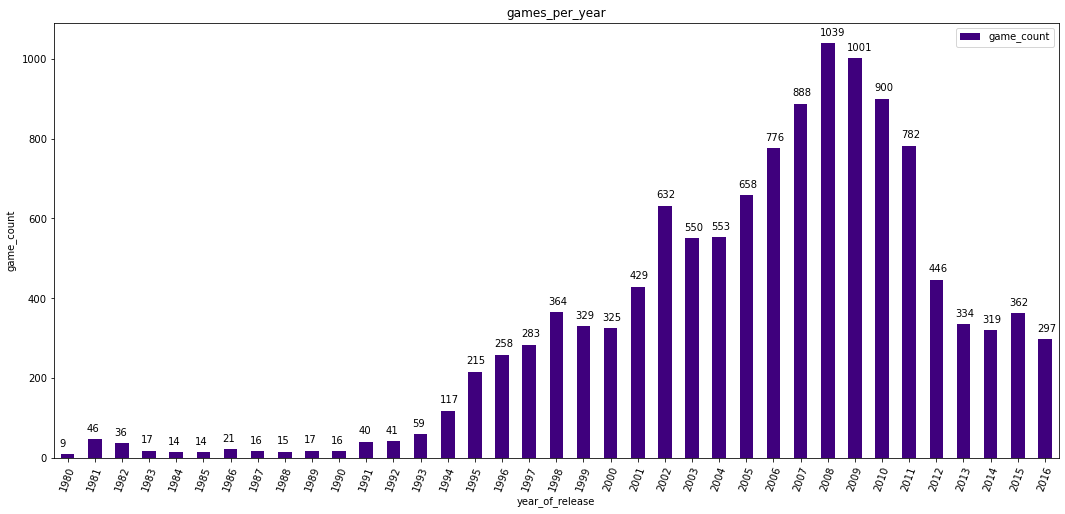

In [57]:
games_per_year.plot.bar(x = 'year_of_release', y = 'game_count', figsize = (18, 8), ylabel = 'game_count',
                        title = 'games_per_year', rot = 70, colormap = 'Purples_r')

count_list = list(games_per_year['game_count'])
year_list = list(games_per_year['year_of_release'])
for i in range(len(year_list)):
    plt.text(i - 0.3, count_list[i] + 20, count_list[i])

plt.show();

what i can conclude from the graph is:

* from 1980 to 1992, not many games were released yearly, probably because gaming consoles were few and not advanced, and gaming in general was stiil in its infancy as a concept and public knowledge
* 1993 marks the beginning of 5th generation platforms, this meant much more platforms were available with better technology, which explains the steady climb of game releases in 1994-1998
* then as the year 2000 approached, computer programmers realized that computers (and everything alike for our matter) might have problems, and the Y2K bug caused lots of panic around the world, that could explain the 1999-2000 dip.
* in 2001 and 2002 there is a big leap in game releases probably because the panic about the Y2Kbug passed, also PS2 was released in 2000 and XBOX in 2001 along with other platforms like Game Cube (GC) and Game Boy Advance (GBA)
* the dip in 2003 and 2004 maybe due to the developers (now, after the excitement had passed) wanted to invest more in quality rather than quantity.
* in 2006-2008 there is a great increase in game releases probably due to the market getting the hang of it and going into momentum, technology-wise and consumer-wise, and also in 2006 there is an introduction of yet another platform with a motion sensor gaming (which was probably very new and exiting) - the Wii, and that while other strong platforms from before which also competed between them, among other things, by making exclusive games to set them apart
* in 2009 the platforms were stable and strong so they and the games themselves probably got a bit more expensive, also smartphones were becoming more widely available, and lastly it was right after the 2008 world financial crisis. This probably led to 1) less people able to consume and also less developers and less budget for game development, 2) development of mobile gaming, which led developers to develop less games for the main platforms, and so - there was a big dip up to 2014
* the releases increased a bit again in 2015 probably because of the simultaneous release of the PS4 and XBox One in nov 2013 and them becoming more widely available by then

###### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [58]:
# Looking at how sales varied from platform to platform
sales_p_platform = orgnzd_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
sales_p_platform = sales_p_platform.sort_values('total_sales', ascending = False).reset_index()
sales_p_platform

,platform,total_sales
0,ps2,1252.04
1,x360,969.82
2,ps3,936.95
3,wii,905.40
4,ds,804.28
5,ps,730.09
6,gba,316.13
7,ps4,314.14
8,psp,293.57
9,pc,259.05


In [59]:
# Choosing the platforms with the greatest total sales
greatest_sales_platforms = sales_p_platform['platform'].head(6)
# building a distribution based on data for each year
best_plat_yearly_sales = orgnzd_games.query('platform in @greatest_sales_platforms').pivot_table(
                                            index = ['platform','year_of_release'],
                                            values = 'total_sales',
                                            aggfunc = 'sum').sort_values('year_of_release').reset_index()
best_plat_yearly_sales

,platform,year_of_release,total_sales
0,ds,1985,0.02
1,ps,1994,6.03
2,ps,1995,35.96
3,ps,1996,94.70
4,ps,1997,136.17
...,...,...,...
63,wii,2015,1.14
64,x360,2015,11.96
65,ps3,2016,3.60
66,wii,2016,0.18


i remembered from before that the ds platform only came out in 2004 so its an input mistake that the game is from 1985 or that its a ds game

In [60]:
# lets check the 1985 game on ds platform
orgnzd_games.query('year_of_release == 1985 and platform == "ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15835,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


since ds is in the name and i couldnt find the release date online, im assuming its the wrong date, lets get rid of that row

In [61]:
# droping the row and reseting index
orgnzd_games.drop(15835, inplace = True)
orgnzd_games.reset_index(inplace = True, drop = True)
# removing it from the above df as well
best_plat_yearly_sales.drop(0, inplace = True)
best_plat_yearly_sales.reset_index(inplace = True, drop = True)

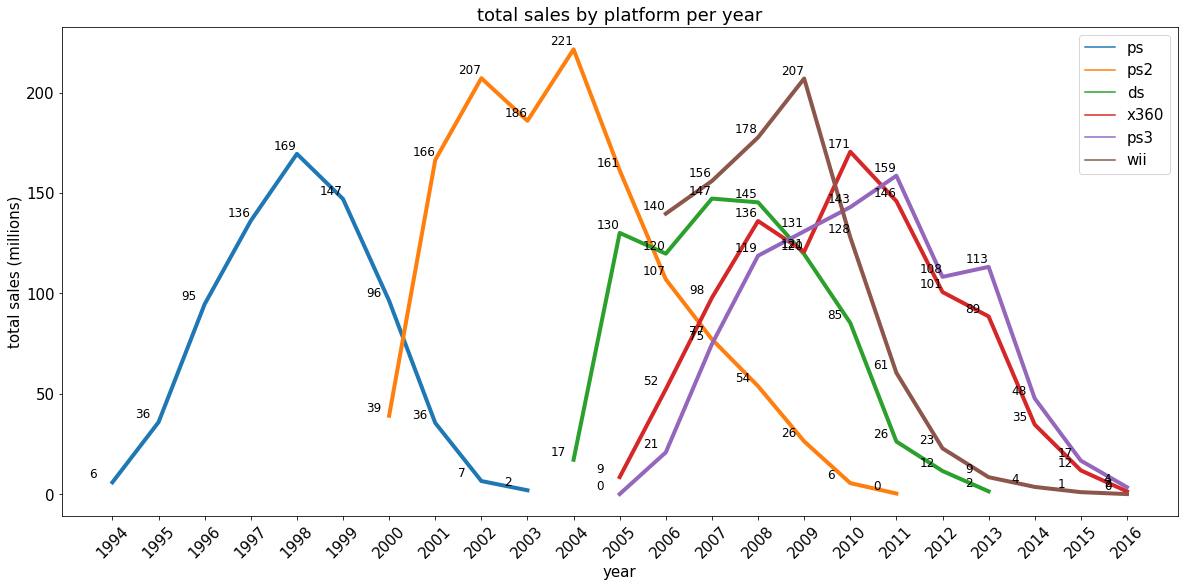

In [62]:
# Finding platforms that used to be popular but now have zero sales
# graph of sales of each platform per year
plt.subplots(figsize = (20, 9))          
lineplot = sns.lineplot(data = best_plat_yearly_sales,
             x = 'year_of_release',
             y = 'total_sales',
             hue = 'platform',
             #size = 'platform',
             lw = 4)

plt.title('total sales by platform per year', size = 18)
plt.xticks(best_plat_yearly_sales['year_of_release'].unique(), rotation = 45, size = 15)
plt.yticks(size = 15)
plt.legend(fontsize = 15)
plt.xlabel('year', size = 15)
plt.ylabel('total sales (millions)', size = 15)

#sales_list = list(best_plat_yearly_sales['total_sales'])
#year_list = list(best_plat_yearly_sales['year_of_release'].unique())
#for i in range(len(year_list)):
    #lineplot.text(i, sales_list[i], str(sales_list[i]))
    
for row in best_plat_yearly_sales.itertuples():
    plt.text(x = row.year_of_release - 0.5, 
             y = row.total_sales + 2, 
             s = round(row.total_sales), 
             #va = 'center', 
             size = 12)

plt.show();

so the platforms that used to be popular but now have zero sales are: ps, ps2 and ds.

In [63]:
best_plat_yearly_sales

,platform,year_of_release,total_sales
0,ps,1994,6.03
1,ps,1995,35.96
2,ps,1996,94.70
3,ps,1997,136.17
4,ps,1998,169.49
...,...,...,...
62,wii,2015,1.14
63,x360,2015,11.96
64,ps3,2016,3.60
65,wii,2016,0.18


In [64]:
def max_sale_year_p_plat(row):
    platform = row['platform']
    #year = row['year_of_release']
    #sales = row['total_sales']
    max_sale = best_plat_yearly_sales.query('platform == @platform')['total_sales'].max()
    max_sale_year = best_plat_yearly_sales.query('platform == @platform and total_sales == @max_sale')['year_of_release']
    return int(max_sale_year.median())

In [65]:
best_plat_yearly_sales1 = best_plat_yearly_sales.copy()
best_plat_yearly_sales1['mx_sale_yr_p_plat'] = best_plat_yearly_sales1.apply(max_sale_year_p_plat, axis = 1)
best_plat_yearly_sales1

,platform,year_of_release,total_sales,mx_sale_yr_p_plat
0,ps,1994,6.03,1998
1,ps,1995,35.96,1998
2,ps,1996,94.70,1998
3,ps,1997,136.17,1998
4,ps,1998,169.49,1998
...,...,...,...,...
62,wii,2015,1.14,2009
63,x360,2015,11.96,2010
64,ps3,2016,3.60,2011
65,wii,2016,0.18,2009


In [66]:
plat_years = best_plat_yearly_sales1.groupby('platform').agg({'year_of_release': ['min', 'max'], 'mx_sale_yr_p_plat': 'median'}).reset_index()
plat_years.columns = ['platform', 'start_year', 'end_year', 'max_sale_year']
plat_years['time_to_appear'] = plat_years['max_sale_year'] - plat_years['start_year']
plat_years['time_to_fade'] = plat_years['end_year'] - plat_years['max_sale_year']
plat_years
mean_appear = int(plat_years['time_to_appear'].mean())
mean_fade = int(plat_years['time_to_fade'].mean())
'so generally it takes {} years for new platforms to appear and {} years for old platforms to fade'.format(mean_appear, mean_fade)

,platform,start_year,end_year,max_sale_year,time_to_appear,time_to_fade
0,ds,2004,2013,2007,3,6
1,ps,1994,2003,1998,4,5
2,ps2,2000,2011,2004,4,7
3,ps3,2005,2016,2011,6,5
4,wii,2006,2016,2009,3,7
5,x360,2005,2016,2010,5,6


'so generally it takes 4 years for new platforms to appear and 6 years for old platforms to fade'

###### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

if it takes 4 years on average for a platform to reach its peak, then for 2017 the relevant data will be from the year 2012 (took 1 more year for safety sake)

In [67]:
# since i want to see only active platforms here i am making a filter
# a table for the max release year per platform
max_plat_yr = orgnzd_games.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'max')
max_plat_yr.columns = ['max_year']
max_plat_yr = max_plat_yr.sort_values('max_year', ascending = False).reset_index()
#max_plat_yr
active_platforms = list(max_plat_yr.query('max_year == 2016')['platform'])

###### Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [68]:
# making a recent games table
recent_games = orgnzd_games.query('year_of_release >= 2012 and platform == @active_platforms').reset_index(drop = True)
recent_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2686,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2687,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2688,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2689,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


###### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [69]:
# checking which platforms are leading in sales
recent_sales_p_platform = recent_games.pivot_table(index = 'platform', values = 'total_sales', 
                                             aggfunc = 'sum').sort_values('total_sales', ascending = False).reset_index()
recent_sales_p_platform

,platform,total_sales
0,ps4,314.14
1,ps3,289.70
2,x360,237.52
3,3ds,195.01
4,xone,159.32
5,wiiu,82.19
6,pc,63.51
7,psv,49.18
8,wii,36.60


ps4, ps3 and x360 are leading in sales. <br>
checking which platforms are growing or shrinking

In [70]:
# 
recent_plat_yearly_sales = recent_games.pivot_table(index = ['platform','year_of_release'], values = 'total_sales',
                                                    aggfunc = 'sum').sort_values(['year_of_release', 'total_sales'], 
                                                                                 ascending = False).reset_index()
recent_plat_yearly_sales

,platform,year_of_release,total_sales
0,ps4,2016,69.25
1,xone,2016,26.15
2,3ds,2016,15.14
3,pc,2016,5.25
4,wiiu,2016,4.60
5,psv,2016,4.25
6,ps3,2016,3.60
7,x360,2016,1.52
8,wii,2016,0.18
9,ps4,2015,118.90


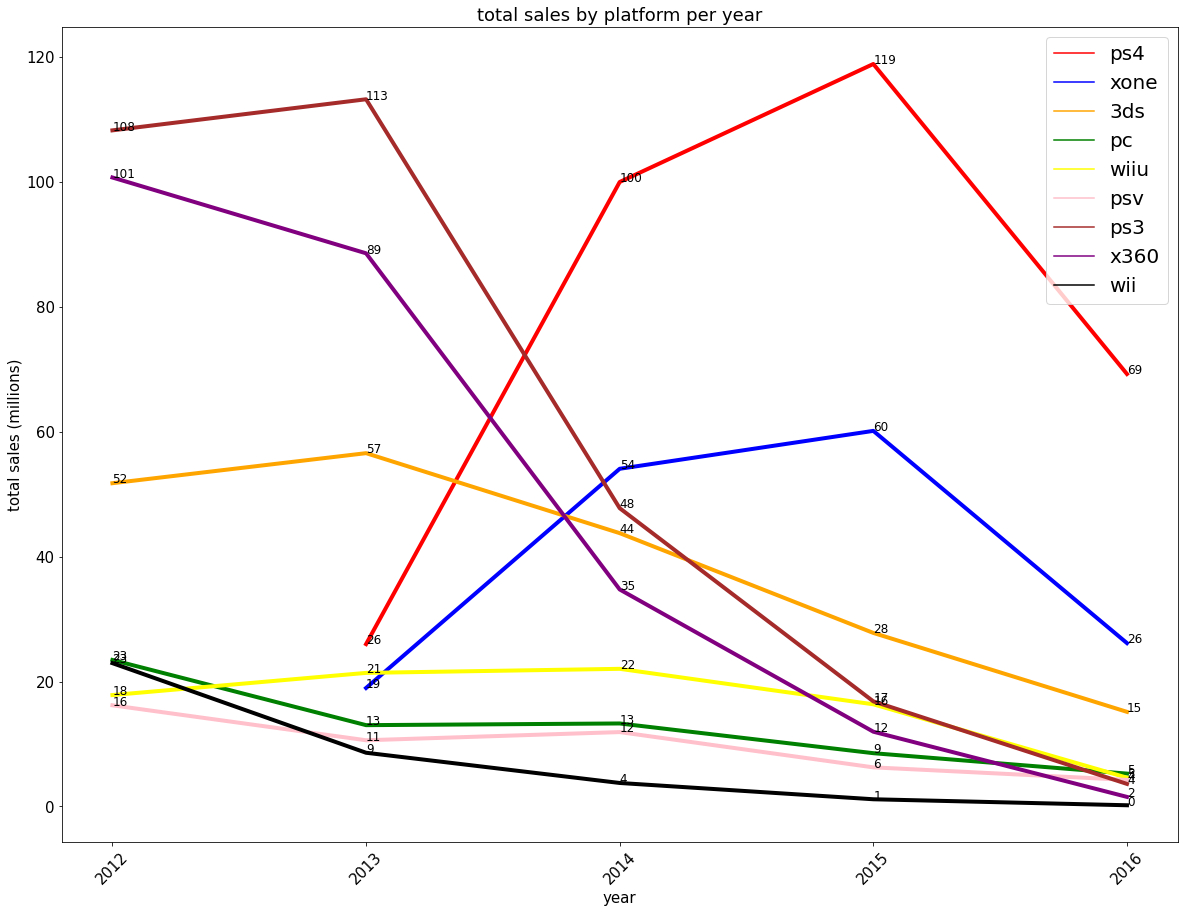

In [71]:
# graph of sales of each platform per year
plt.subplots(figsize = (20, 15))          
sns.lineplot(data = recent_plat_yearly_sales,
             x = 'year_of_release',
             y = 'total_sales',
             hue = 'platform',
             lw = 4,
             palette = ['red', 'blue', 'orange', 'green', 'yellow', 'pink', 'brown', 'purple', 'black'])

plt.title('total sales by platform per year', size = 18)
plt.xticks(recent_plat_yearly_sales['year_of_release'].unique(), rotation = 45, size = 15)
plt.yticks(size = 15)
plt.legend(fontsize = 20)
plt.xlabel('year', size = 15)
plt.ylabel('total sales (millions)', size = 15)
    
for row in recent_plat_yearly_sales.itertuples():
    plt.text(x = row.year_of_release, 
             y = row.total_sales, 
             s = round(row.total_sales), 
             #va = 'center', 
             size = 12)

plt.show();

as can be seen all the platforms are shrinking <br>
selecting several potentially profitable platforms: ps4, xone, pc and 3ds (3ds is in last place since it is an older platform, had been down since 2013, and based on the trend in the graph and the fact that it is not an upgradable platform while a pc is, probably will perform worse then a pc in sales in the following years) <br>
(but if its only because the data for 2016 is not full so ill look at 2015 - then the potentially profitable platforms are only ps4 and xone)

###### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [72]:
# making a list of platforms ordered by their mean sales for the boxplot below
mean_sales_p_plat = recent_games.pivot_table(index = 'platform', values = 'total_sales').sort_values('total_sales', ascending = False).reset_index()
plat_sort_list = list(mean_sales_p_plat['platform'])

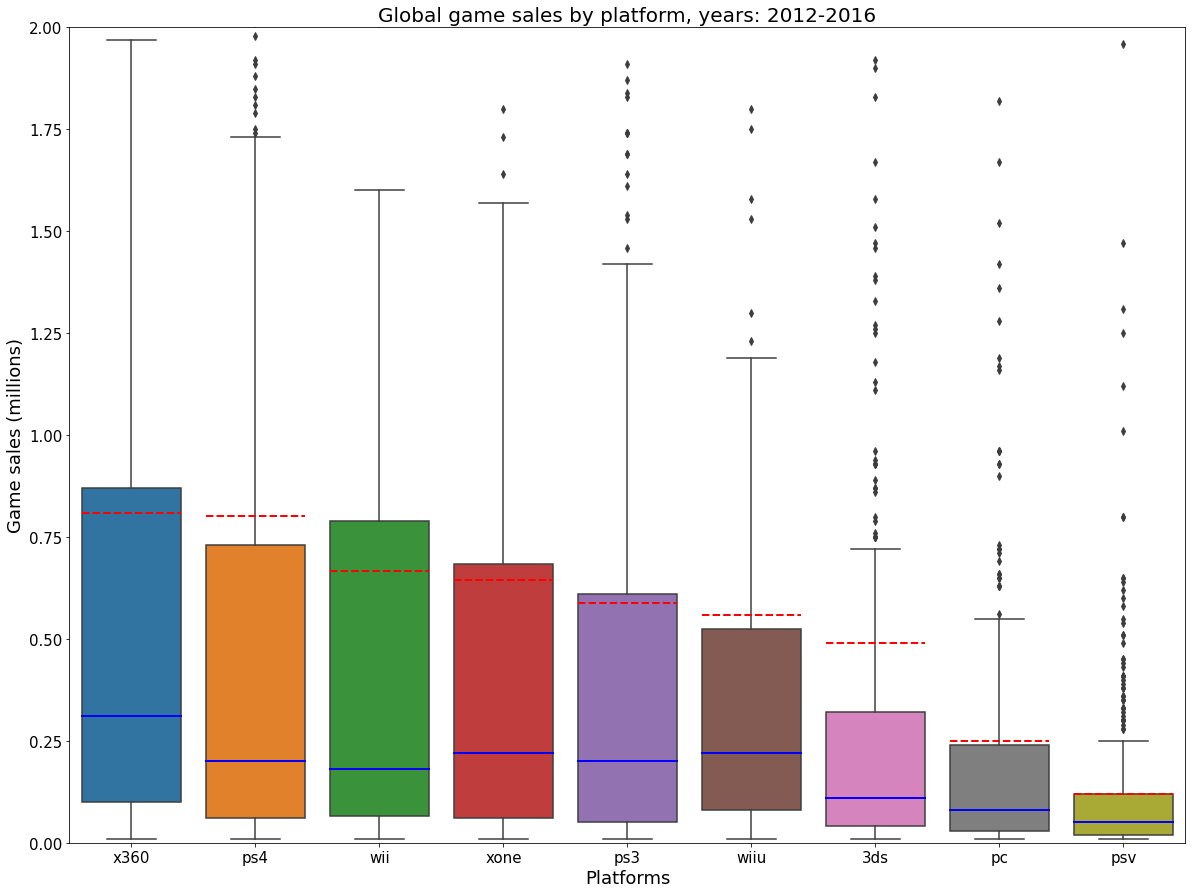

In [73]:
# plotting a grapg for global game sales per platform
plt.subplots(figsize = (20, 15))
sns.boxplot(data = recent_games, x = 'platform', y = 'total_sales',
            showmeans = True, order = plat_sort_list, meanline = True,
            meanprops = {'color': 'red', 'lw': 2}, medianprops = {'color': 'blue', 'lw': 2})
            #hue = 'platform',
            #width = 7,
            #widths = 1,
            #orient = 'h',
            #positions = (1, 12))

plt.title('Global game sales by platform, years: 2012-2016', fontsize = 20)
plt.xlabel('Platforms', size = 18)
plt.ylabel('Game sales (millions)', size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.xlim(-2,12)
plt.ylim(0, 2)
plt.show();

**answering if the differences in sales significant**<br>
yes, the differences are significant, especially between the home consoles (6 from the left) and the handheld (and pc) consoles (the remaining)

**answering what about average sales on various platforms?** <br>
dont understand what is asked here.. what about them? <br>
if the question is what platform has the most average sales then as can be seen in the graph above its x360, ps4, wii and xone.

**describing my findings** <br>
* seems like the dominant theme is home consoles and not handheld ones
* pc low sales are surprising on the one hand but on the other hand its not a dedicated gaming platform while its compared to them.
* all home consoles except x360 have same-range median, which implies that most games on those platforms had approximately the same sales 
* all the platforms have a higher mean then median because of the outliers
* between the handheld consoles 3ds performs better than the psv
* based on the graph we can maybe conclude by looking at x360 and ps3 that the xbox has more lastability than the playstation
* also consumers shifting faster to new generation of the playstation then they are to the newer xbox
* the x360 has a high median (compared to other home consoles) which means that ussually games on that platform have more sales (maybe its because its more accessible since its older than ps3 so its probably cheaper)
* psv has the lowest average and median sales, its going out of date

###### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

**taking a look at how user and professional reviews affect sales for one `popular` platform**

In [74]:
# looking what platform is the most popular amongs critics
recent_games.loc[(recent_games['critic_score'].notnull()) & (recent_games['user_score'].notnull())]['platform'].value_counts()

ps3     277
ps4     251
x360    225
pc      206
xone    180
psv     127
3ds     111
wiiu     97
wii      18
Name: platform, dtype: int64

so ill chose ps4 (since its in the top 2 both here and in the graph above)<br>
**building a scatter plot and calculate the correlation between reviews and sales**

In [75]:
no_null_score = recent_games.loc[(recent_games['critic_score'].notnull()) & (recent_games['user_score'].notnull())]
no_null_score['user_score'] *= 10
task6_games = no_null_score.query('platform == "ps4"')#[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
task6_games

<ipython-input-75-4fc14e7e4494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_score['user_score'] *= 10


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
14,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
17,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66
18,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
21,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2614,super dungeon bros,ps4,2016,action,0.01,0.00,0.00,0.00,42.0,23.0,E10+,0.01
2618,sherlock holmes: the devil's daughter,ps4,2016,adventure,0.01,0.00,0.00,0.00,70.0,68.0,T,0.01
2619,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69.0,75.0,M,0.01
2629,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,79.0,T,0.01


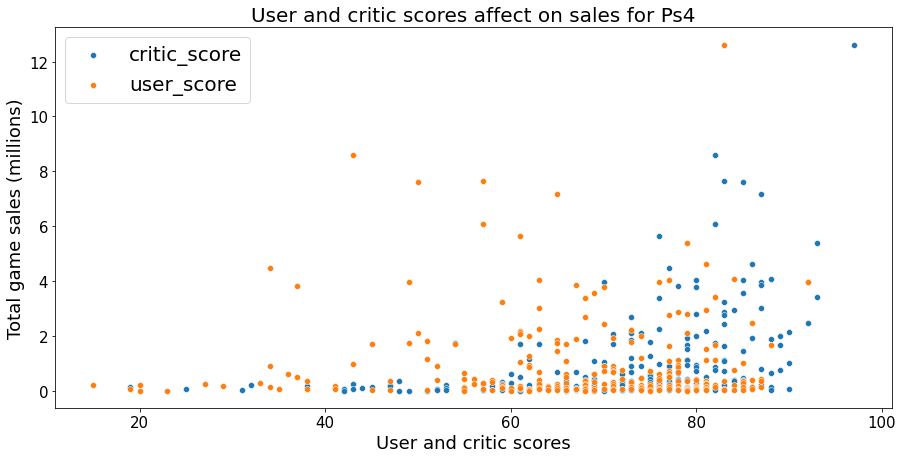

In [76]:
plt.subplots(figsize = (15, 7))
sns.scatterplot(data = task6_games, x = 'critic_score', y = 'total_sales')
sns.scatterplot(data = task6_games, x = 'user_score', y = 'total_sales')

plt.title('User and critic scores affect on sales for Ps4', fontsize = 20)
plt.xlabel('User and critic scores', size = 18)
plt.ylabel('Total game sales (millions)', size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(['critic_score', 'user_score'], fontsize = 20)
plt.show();

In [77]:
task6_games[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.556897,0.406563
user_score,0.556897,1.000000,-0.033063
total_sales,0.406563,-0.033063,1.000000


**drawing conclusions**: <br>
* the affect is pretty slim, though there is a small correlation here, it can be seen that as the scores go higher so does the sales, but just a bit and less so in user score then critic scores
* also we can see that there are a lot of instances that has both scores high, but still has low sales which again shows that the link between the scores and sales is minimal

###### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

(i cant do this to the **same games** on other platforms since 1. other platforms [as can be seen in the value counts above] have less **names** [not games] and 2. since its not necessarily and probably not the same games, especially on wii and handheld consoles, though i will just check the same no null scores table)

In [78]:
remaining_plat = plat_sort_list
remaining_plat.remove('ps4')

In [79]:
# function to plot scatterplots to each platform passed
def scores_sales_corr_p_plat(plat):
    plt.subplots(figsize = (15, 7))
    task7 = no_null_score.query('platform == @plat')
    sns.scatterplot(data = task7, x = 'critic_score', y = 'total_sales')
    sns.scatterplot(data = task7, x = 'user_score', y = 'total_sales')
    
    #start = "\033[1m"
    #end = "\033[0;0m"
    
    plt.title('User and critic scores affect on sales for {}'.format(plat), fontsize = 20)
    plt.xlabel('User and critic scores', size = 18)
    plt.ylabel('Total game sales (millions)', size = 18)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.legend(['critic_score', 'user_score'], fontsize = 20)
    score_sales_corr = task7[['critic_score', 'user_score', 'total_sales']].corr()
    plt.show();
    text = 'Scores-sales correlation of {}'.format(colored(plat, 'red', attrs=['bold']))
    print(text)
    print(score_sales_corr)

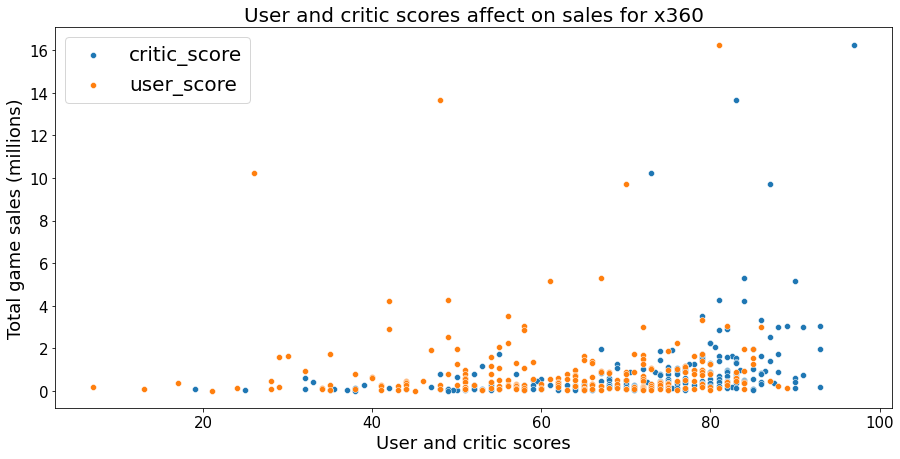

Scores-sales correlation of x360
              critic_score  user_score  total_sales
critic_score      1.000000    0.372757     0.325769
user_score        0.372757    1.000000     0.001408
total_sales       0.325769    0.001408     1.000000


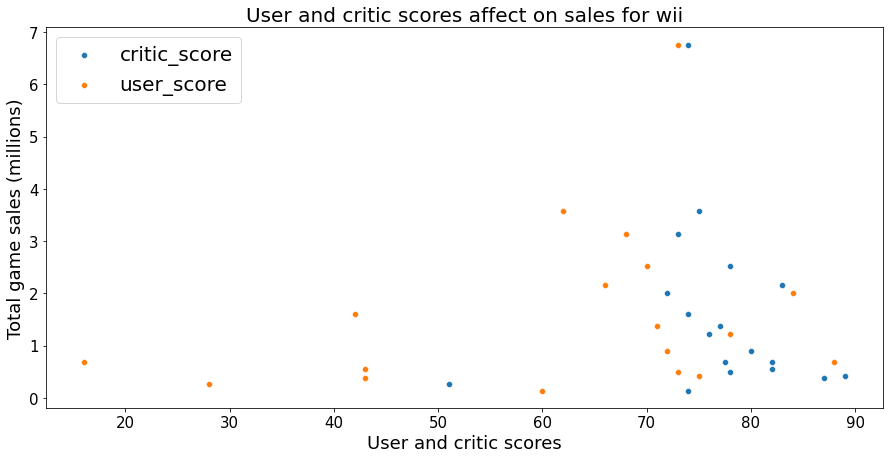

Scores-sales correlation of wii
              critic_score  user_score  total_sales
critic_score      1.000000    0.306586    -0.105931
user_score        0.306586    1.000000     0.277542
total_sales      -0.105931    0.277542     1.000000


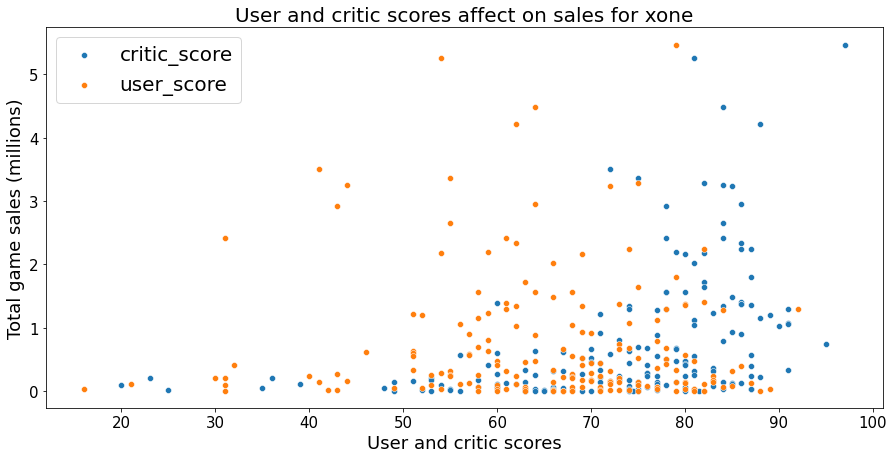

Scores-sales correlation of xone
              critic_score  user_score  total_sales
critic_score      1.000000    0.466535     0.410230
user_score        0.466535    1.000000    -0.074276
total_sales       0.410230   -0.074276     1.000000


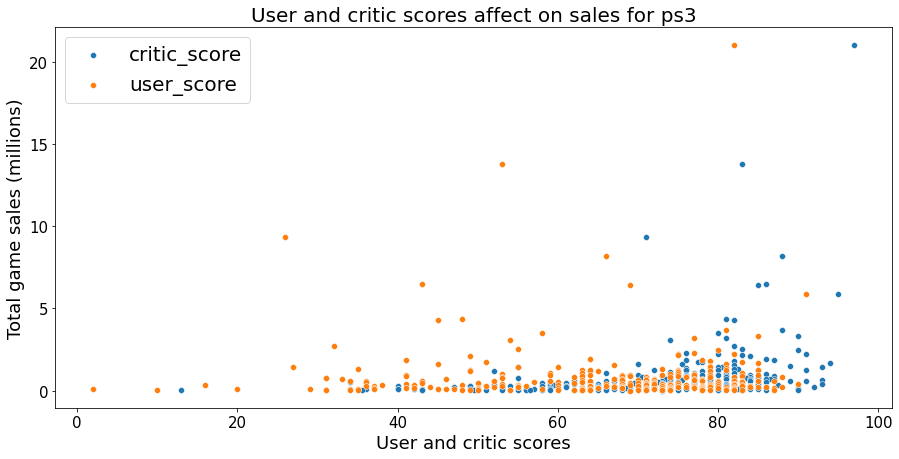

Scores-sales correlation of ps3
              critic_score  user_score  total_sales
critic_score      1.000000    0.368926     0.307933
user_score        0.368926    1.000000    -0.007087
total_sales       0.307933   -0.007087     1.000000


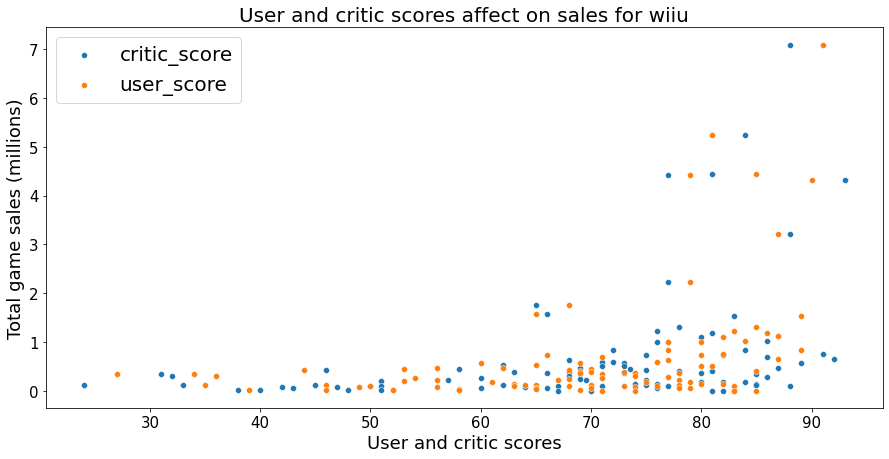

Scores-sales correlation of wiiu
              critic_score  user_score  total_sales
critic_score      1.000000    0.781632     0.358122
user_score        0.781632    1.000000     0.396303
total_sales       0.358122    0.396303     1.000000


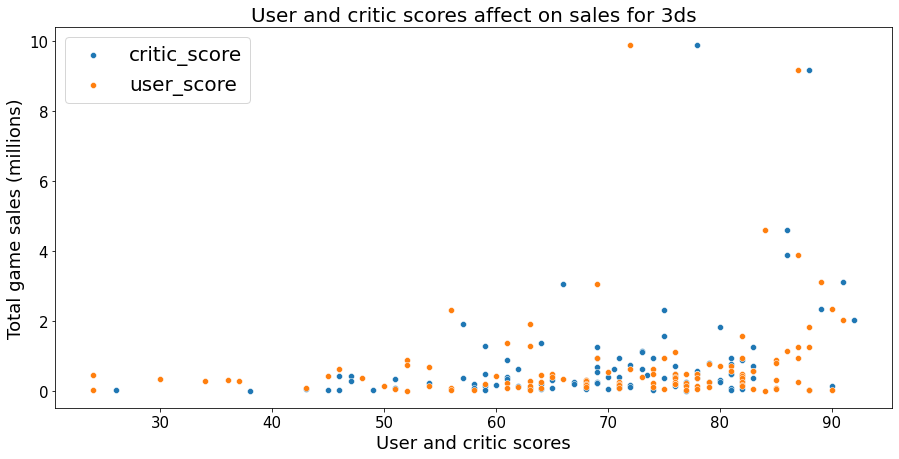

Scores-sales correlation of 3ds
              critic_score  user_score  total_sales
critic_score      1.000000    0.605155     0.307366
user_score        0.605155    1.000000     0.200372
total_sales       0.307366    0.200372     1.000000


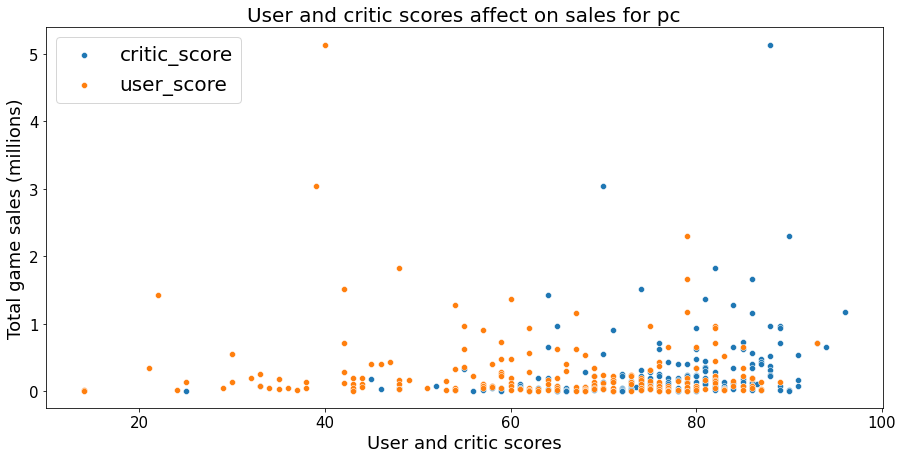

Scores-sales correlation of pc
              critic_score  user_score  total_sales
critic_score      1.000000    0.465261     0.237139
user_score        0.465261    1.000000    -0.122719
total_sales       0.237139   -0.122719     1.000000


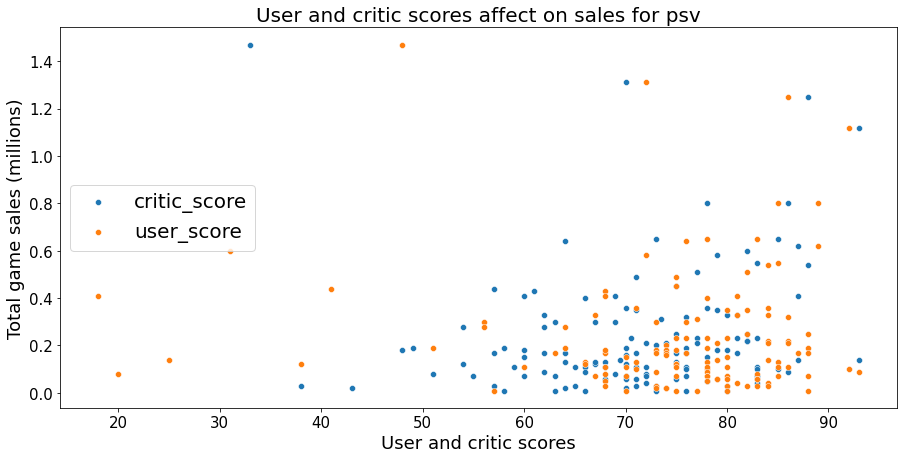

Scores-sales correlation of psv
              critic_score  user_score  total_sales
critic_score      1.000000    0.414028     0.114687
user_score        0.414028    1.000000    -0.030198
total_sales       0.114687   -0.030198     1.000000


In [80]:
for plat in remaining_plat:
    scores_sales_corr_p_plat(plat)

i did a calculation of both scores corr to the sales for each platform: <br>
wiiu: 754, 3ds: 507, xone: 484, wii: 383, pc: 359, x360: 327, ps3: 315, psv: 144
* the strongest corr is in the platform wiiu
* the weakest corr is in the platform psv

but all are still with almost no real correlation at all, and still the critic's corr is stronger than the user's corr to sales

###### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

**taking a look at the general distribution of games by genre**

In [81]:
recent_games['genre'].value_counts()

action          961
role-playing    339
sports          255
adventure       247
shooter         237
misc            180
racing          115
fighting        105
platform         83
simulation       78
strategy         67
puzzle           24
Name: genre, dtype: int64

**looking what can i say about the most profitable genres**

In [82]:
genre_games = recent_games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ('mean', 'sum', 'count'))

# renaming columns (its avg sales per unit and not per game..)
genre_games.columns = ['unit_count', 'sales_p_"name"/unit', 'total_sales']
'(values in millions)'
top5_by_avg_sales = genre_games.sort_values(['sales_p_"name"/unit'], ascending = False).reset_index().head()
top5_by_all_sales = genre_games.sort_values(['total_sales'], ascending = False).reset_index().head()
top5_by_unit_count = genre_games.sort_values(['unit_count'], ascending = False).reset_index().head()
'(top5_by_avg_sales)'
top5_by_avg_sales
'(top5_by_all_sales)'
top5_by_all_sales
'(top5_by_unit_count)'
top5_by_unit_count

'(values in millions)'

'(top5_by_avg_sales)'

,genre,unit_count,"sales_p_""name""/unit",total_sales
0,shooter,237,1.285865,304.75
1,platform,83,0.726627,60.31
2,sports,255,0.704078,179.54
3,role-playing,339,0.533658,180.91
4,misc,180,0.467500,84.15


'(top5_by_all_sales)'

,genre,unit_count,"sales_p_""name""/unit",total_sales
0,action,961,0.457763,439.91
1,shooter,237,1.285865,304.75
2,role-playing,339,0.533658,180.91
3,sports,255,0.704078,179.54
4,misc,180,0.467500,84.15


'(top5_by_unit_count)'

,genre,unit_count,"sales_p_""name""/unit",total_sales
0,action,961,0.457763,439.91
1,role-playing,339,0.533658,180.91
2,sports,255,0.704078,179.54
3,adventure,247,0.112146,27.70
4,shooter,237,1.285865,304.75


i am choosing only the genres that are in all the top5's <br>
so the most profitable genres overall are: 
* 1st: shooter (best)
* 2nd: role-playing (RPG)
* 3rd: sports

###### generalizing about genres with high and low sales

In [83]:
bottom5_by_avg_sales = genre_games.sort_values(['sales_p_"name"/unit']).reset_index().head()
bottom5_by_all_sales = genre_games.sort_values(['total_sales']).reset_index().head()
bottom5_by_unit_count = genre_games.sort_values(['unit_count']).reset_index().head()
'(bottom5_by_avg_sales)'
bottom5_by_avg_sales
'(bottom5_by_all_sales)'
bottom5_by_all_sales
'(bottom5_by_unit_count)'
bottom5_by_unit_count

'(bottom5_by_avg_sales)'

,genre,unit_count,"sales_p_""name""/unit",total_sales
0,adventure,247,0.112146,27.70
1,strategy,67,0.188507,12.63
2,puzzle,24,0.199583,4.79
3,fighting,105,0.420286,44.13
4,simulation,78,0.446795,34.85


'(bottom5_by_all_sales)'

,genre,unit_count,"sales_p_""name""/unit",total_sales
0,puzzle,24,0.199583,4.79
1,strategy,67,0.188507,12.63
2,adventure,247,0.112146,27.70
3,simulation,78,0.446795,34.85
4,fighting,105,0.420286,44.13


'(bottom5_by_unit_count)'

,genre,unit_count,"sales_p_""name""/unit",total_sales
0,puzzle,24,0.199583,4.79
1,strategy,67,0.188507,12.63
2,simulation,78,0.446795,34.85
3,platform,83,0.726627,60.31
4,fighting,105,0.420286,44.13


i am choosing only the genres that are in all the bottom5's <br>
so the least profitable genres overall are: 
* 1st: puzzle (worst)
* 2nd: strategy
* 3rd: simulation
* 4th: fighting

so the best genres are:
* 1st: shooter (best)
* 2nd: role-playing (RPG)
* 3rd: sports

and the worst are:
* 1st: puzzle (worst)
* 2nd: strategy
* 3rd: simulation
* 4th: fighting

so what i generalize is:
* that people are more into what is "cool" in recent years, i conclude this because i see that all the worst genres are ones that are very old in their style
* that people are drawn much more to multi-player genres, rather that player-v-player or single-player

# Step 4. Create a user profile for each region

###### For each region (NA, EU, JP), determine the top five platforms. Describe variations in their market shares from region to region.

**determining the top 5 platforms for each region**

In [84]:

na_by_plat = recent_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
eu_by_plat = recent_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
jp_by_plat = recent_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
na_top5_plat = na_by_plat.sort_values('na_sales', ascending = False).reset_index().head()
eu_top5_plat = eu_by_plat.sort_values('eu_sales', ascending = False).reset_index().head()
jp_top5_plat = jp_by_plat.sort_values('jp_sales', ascending = False).reset_index().head()
all_top5plat = (na_top5_plat.merge(eu_top5_plat, on='platform', how='outer')
                            .merge(jp_top5_plat, on='platform', how='outer')).fillna(0)
all_top5plat

,platform,na_sales,eu_sales,jp_sales
0,x360,140.57,74.89,0.00
1,ps4,108.74,141.09,15.96
2,ps3,103.74,107.26,35.29
3,xone,93.12,51.59,0.00
4,3ds,55.49,42.83,87.79
5,psv,0.00,0.00,21.04
6,wiiu,0.00,0.00,13.01


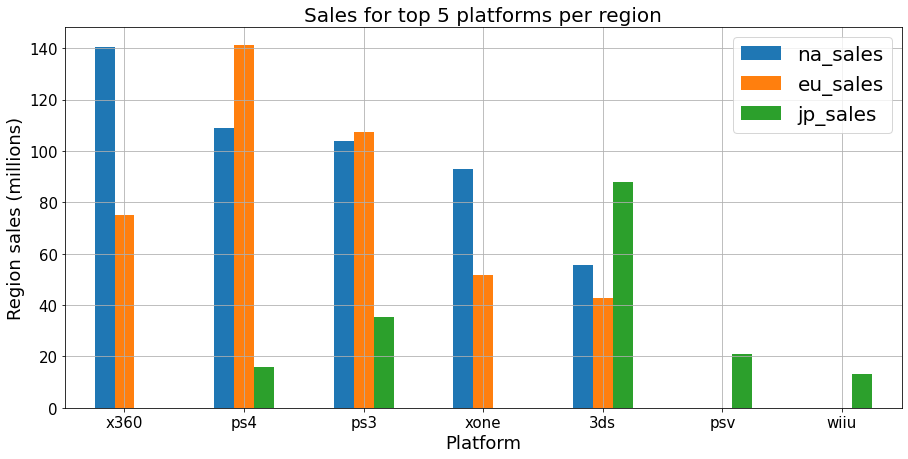

In [85]:
all_top5plat.plot.bar(x = 'platform', rot = 0, figsize = (15, 7), grid = True)
plt.title('Sales for top 5 platforms per region', fontsize = 20)
plt.xlabel('Platform', size = 18)
plt.ylabel('Region sales (millions)', size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize = 20);

**describing variations in their market shares from region to region** <br>
from the graph we see that:
* there are only consoles, pc didnt make it to top 5 in any region
* japan prefers handheld consoles (probably because they are always on the go with a super busy lifestyle - unfortunatly), no xbox didnt even make to their top 5, and even the home console that did - the platstation: they dont use it or upgrade it much
* psv is very unpopular in general and probably sells in japan mostly due to them liking handheld consoles
* wiiu is probably got to top 5 because its company nintendo is native to japan so it gets more popularity

###### For each region (NA, EU, JP), determine the top five genres. Explain the difference.

**determining the top 5 genres for each region**

In [86]:
na_by_genre = recent_games.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
eu_by_genre = recent_games.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
jp_by_genre = recent_games.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
na_top5_genre = na_by_genre.sort_values('na_sales', ascending = False).reset_index().head()
eu_top5_genre = eu_by_genre.sort_values('eu_sales', ascending = False).reset_index().head()
jp_top5_genre = jp_by_genre.sort_values('jp_sales', ascending = False).reset_index().head()
all_top5genre = (na_top5_genre.merge(eu_top5_genre, on='genre', how='outer')
                            .merge(jp_top5_genre, on='genre', how='outer')).fillna(0)
all_top5genre

,genre,na_sales,eu_sales,jp_sales
0,action,178.87,160.44,49.18
1,shooter,144.79,113.47,9.23
2,sports,81.38,68.83,0.00
3,role-playing,60.65,46.76,59.12
4,misc,38.13,0.00,12.45
5,racing,0.00,27.29,0.00
6,simulation,0.00,0.00,10.35


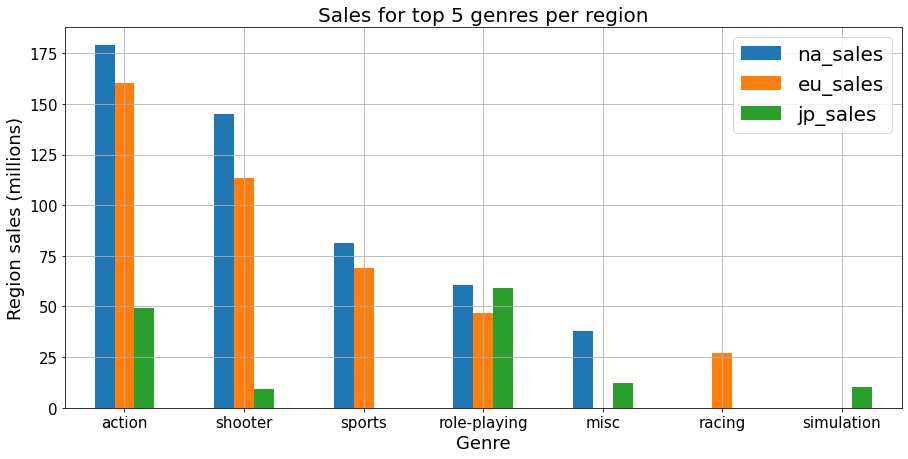

In [87]:
all_top5genre.plot.bar(x = 'genre', rot = 0, figsize = (15, 7), grid = True)
plt.title('Sales for top 5 genres per region', fontsize = 20)
plt.xlabel('Genre', size = 18)
plt.ylabel('Region sales (millions)', size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize = 20);

**explaining the difference** <br>
since there is different cultures in the regions there are differences: 
* so japan, as a place of anime and manga, prefers animated and action packed or teaching genres (probably because as we said they have a very busy and demanding life so they prefer to learn something while playing as well) like RPG, action, simulation or misc instead racing or sports which are pretty mainstream
* europe on the other hand is pretty mainstream and also racing is pretty popular there (they have the famous "formula-1" for example), so thats why it has racing genre and dont have misc or simulation in their top 5
* in north america people just buy the popular genres, so its understandable why its first 4 genres are the way they are, but misc toping racing needs an explanation: since misc is a mix of a couple of genres its has all the popular aspects of the other genres, and racing dont bother that much north americans (maybe because they like taking things slow :) )

###### For each region (NA, EU, JP), determine if ESRB ratings affect sales in individual regions

In [88]:
na_by_rating = recent_games.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'mean')
eu_by_rating = recent_games.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'mean')
jp_by_rating = recent_games.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'mean')
na_by_rating = na_by_rating.sort_values('na_sales').reset_index()
jp_by_rating = jp_by_rating.sort_values('jp_sales').reset_index()
eu_by_rating = eu_by_rating.sort_values('eu_sales').reset_index()
na_by_rating
jp_by_rating
eu_by_rating

,rating,na_sales
0,T,0.151739
1,E10+,0.275305
2,E,0.292882
3,M,0.449012


,rating,jp_sales
0,E10+,0.029909
1,M,0.039859
2,T,0.061891
3,E,0.071579


,rating,eu_sales
0,T,0.124000
1,E10+,0.206311
2,E,0.286090
3,M,0.380811


* europe and north america follow the exact same pattern, the teen rating has the least sales per unit/name (not game/title) and mature has the most
* japan un-surprisingly sells the everyone rating better than the rest ratings (since it includes the non-gore and RPG genres they love), followed by the teen rating and the least profitable rating is for 10+

# Step 5. Test the following hypotheses:

###### 1 Average user ratings of the Xbox One and PC platforms are the same

In [89]:
# creating tables of user scores for xbox and pc
xone_score= recent_games.query('platform == "xone"')[['platform','user_score']].dropna()
pc_score = recent_games.query('platform == "pc"')[['platform','user_score']].dropna()

# calculating the mean for each
xone_score_mean = xone_score['user_score'].mean()
pc_score_mean = pc_score['user_score'].mean()

# now ill check if the var is equal
'xone var:',np.var(xone_score['user_score'])
'pc var',np.var(pc_score['user_score'])

('xone var:', 1.8965188383045533)

('pc var', 2.7341384964398827)

To test this hypothesis first we need to define H0 and H1.
* H0: Mean(xone) == Mean(pc)
* H1: Mean(xone) != Mean(pc)
* To test it, we'll apply the method scipy.stats.ttest_ind (array1, array2, equal_var). <br>
equal_var = False  because the variance of the samples is different.

alpha = 5% by convention.

In [90]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(xone_score['user_score'], pc_score['user_score'], equal_var = False, nan_policy = 'omit')

print('p-value: ', results.pvalue.round(3))

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average user scores of the xone and pc platforms differ.")
    if xone_score_mean > pc_score_mean:
        print('xone games got higher rating on average.')
    else:
        print('pc games got higher rating on average.')
else:
    print("We can't reject the null hypothesis, the average user scores of the xone and pc platforms can be the same.")

p-value:  0.6206366351489678
We can't reject the null hypothesis, the average user scores of the xone and pc platforms can be the same.


###### 2 Average user ratings for the Action and Sports genres are different.

In [91]:
# creating tables of user scores for action and sports genres
action_score= recent_games.query('genre == "action"')[['genre','user_score']].dropna()
sports_score = recent_games.query('genre == "sports"')[['genre','user_score']].dropna()

# calculating the mean for each
action_score_mean = action_score['user_score'].mean()
sports_score_mean = sports_score['user_score'].mean()

# now ill check if the var is equal
'action var:',np.var(action_score['user_score'])
'sports var',np.var(sports_score['user_score'])

('action var:', 1.8535466884756664)

('sports var', 3.0165341351445685)

To test this hypothesis first we need to define H0 and H1.
* H0: Mean(action) == Mean(sports)
* H1: Mean(action) != Mean(sports)
* To test it, we'll apply the method scipy.stats.ttest_ind (array1, array2, equal_var). <br>
equal_var = False  because the variance of the samples is different.

alpha = 5% by convention.

In [92]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(action_score['user_score'], sports_score['user_score'], equal_var = False, nan_policy = 'omit')

print('p-value: ', results.pvalue.round(3))

if results.pvalue < alpha:
    print("We reject the null hypothesis, the average user scores of the action and sports genres differ.")
    if action_score_mean > sports_score_mean:
        print('action games got higher rating on average.')
    else:
        print('sports games got higher rating on average.')
else:
    print("We can't reject the null hypothesis, the average user scores of the action and sports genres can be the same.")

p-value:  4.0813001496969816e-20
We reject the null hypothesis, the average user scores of the action and sports genres differ.
action games got higher rating on average.


# Step 6. Write a general conclusion

**Preprocessing** - originally i got a data about game sales and their different platforms and genres.
The data contained nulls that needed to be calculated to fill and had errors and little duplicates.
first i organized the table by making the column names lower case as well as all object columns contents <br>
then i converted the columns to their proper data types, fixed little errors and removed duplicates.
then i filled several nulls in year_of_release, rating and critic_score, with values (or medians of them) from other rows of games with the same name available for other platforms and the year also by the numbers in the name itself, additional nulls in year_of_release and rating, with high sales i filled manually, and the little bit of the remaing year_of_release nulls i dropped. i left missing values in rating, user_score, and critic_score, because those columns are not needed for all parts of our analysis. <br>
then i adjusted the ESRB ratings to remove any old rating types, and in the end i got a table of 16583 rows with no problematic nulls and no duplicates.<br>

**Analyzing the data** - i checked how many games were released in different years to start seeing the relevant years for the analysis, then found the platforms with the greatest total sales and figured out the timeframe of relevance for platforms in general to know which years are relevant, and determined what period to take data for building a prognosis for 2017.
* i took data from 2012 - 2016 of all platforms that were still active in 2016. 
* i found that the leading platforms were ps4, ps3 and x360
* but the platforms that are growing in sales are ps4 and xone
* the north american region has the largest influence on overall global sales.
* there is no need to consider the user score, the critic score is a bit more important but still not critical for the sales
* the european and north american regions are roughly the same but entirely different strategies have to be adopted for the japanese region.
* for example home consoles perform better than their handheld counterparts across both regions but handheld platforms are very popular in japan.
* another example is the ESRB rating - europe and north america follow the exact same pattern, the T rating has the least sales per unit/name (not game/title) and M has the most sales and japan un-surprisingly sells the E rating better than the rest ratings (since it includes the non-gore and RPG genres they love), followed by the T rating and the least profitable rating is for E10+

**Testing the hypotheses** - 
i couldnt reject the first H0, but did reject the second H0

so in both na and eu regions, i would suggest focusing advertising mainly on ps4, xone, ps3 and x360 platforms, action and shooter genres, of the T rating. <br>
and for the jp region i would suggest focusing advertising mainly on a handheld platform, specifically 3ds and also on the last 2 playstation genarations, RPG and action genre-wise, of the E rating.